# FIFA PROJECT

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Data cleaning


In [2]:
# uploading dataset

data = pd.read_csv('data.csv')
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [3]:
# Standarising columns

data.columns = data.columns.str.lower().str.replace(' ', '_')

In [4]:
# dropping columns

data_clean = data.drop(['attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender','name','position','player_photo','club_logo','flag_photo','team_&_contract','pot','bov','growth','joined','loan_date_end','release_clause','contract'], axis=1)

In [5]:
data_clean.shape

(17125, 17)

In [6]:
data_clean.columns

Index(['id', 'age', 'ova', 'nationality', 'club', 'bp', 'height', 'weight',
       'foot', 'value', 'wage', 'pac', 'sho', 'pas', 'dri', 'def', 'phy'],
      dtype='object')

In [7]:
# reorganising columns to put Target at the end.

data_clean = data_clean[['id', 'age', 'nationality', 'club', 'bp', 'height', 'weight',
       'foot', 'value', 'wage', 'pac', 'sho', 'pas', 'dri', 'def', 'phy','ova']]

In [8]:
# making a copy and setting "id" as Index.

data_clean2 = data_clean.copy()
data_clean2 = data_clean2.set_index('id')

In [9]:
data_clean2

,age,nationality,club,bp,height,weight,foot,value,wage,pac,sho,pas,dri,def,phy,ova
id,,,,,,,,,,,,,,,,
2,33,Italy,Udinese,LWB,"6'0""",181lbs,Left,€625K,€7K,71,59,70,71,68,69,69
16,37,Spain,KAS Eupen,CM,"5'10""",143lbs,Right,€600K,€7K,53,69,73,69,58,63,71
27,33,England,Coventry City,CAM,"5'9""",161lbs,Right,€1.1M,€15K,45,68,76,77,36,52,71
36,36,Trinidad &amp; Tobago,Sunderland,ST,"5'11""",165lbs,Right,€0,€0,61,66,66,69,47,60,68
41,36,Spain,Vissel Kobe,CAM,"5'7""",150lbs,Right,€5.5M,€12K,58,70,85,85,63,59,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,France,CD Tondela,CB,"6'6""",165lbs,Right,€550K,€2K,54,30,37,48,64,69,64
259090,18,Wales,Burnley,CAM,"5'10""",170lbs,Right,€130K,€3K,62,46,57,56,43,55,56
259091,18,England,Burnley,RB,"5'9""",154lbs,Right,€130K,€2K,63,35,44,52,54,55,56


In [10]:
# checking data types

data_clean2.dtypes

age             int64
nationality    object
club           object
bp             object
height         object
weight         object
foot           object
value          object
wage           object
pac             int64
sho             int64
pas             int64
dri             int64
def             int64
phy             int64
ova             int64
dtype: object

In [11]:
# cleaning columns

In [12]:
# transforming feets and inches into cm (height) 

import re
def convert_to_cm(x):
    values = re.findall(r'\d+', x)
    ft = int(values[0])
    try:
        inches = int(values[1])
    except IndexError:
        inches = 0
    return (ft * 12 + inches)*2.54
data_clean2['height'] = data_clean2['height'].apply(convert_to_cm)

In [13]:
data_clean2

,age,nationality,club,bp,height,weight,foot,value,wage,pac,sho,pas,dri,def,phy,ova
id,,,,,,,,,,,,,,,,
2,33,Italy,Udinese,LWB,182.88,181lbs,Left,€625K,€7K,71,59,70,71,68,69,69
16,37,Spain,KAS Eupen,CM,177.80,143lbs,Right,€600K,€7K,53,69,73,69,58,63,71
27,33,England,Coventry City,CAM,175.26,161lbs,Right,€1.1M,€15K,45,68,76,77,36,52,71
36,36,Trinidad &amp; Tobago,Sunderland,ST,180.34,165lbs,Right,€0,€0,61,66,66,69,47,60,68
41,36,Spain,Vissel Kobe,CAM,170.18,150lbs,Right,€5.5M,€12K,58,70,85,85,63,59,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,France,CD Tondela,CB,198.12,165lbs,Right,€550K,€2K,54,30,37,48,64,69,64
259090,18,Wales,Burnley,CAM,177.80,170lbs,Right,€130K,€3K,62,46,57,56,43,55,56
259091,18,England,Burnley,RB,175.26,154lbs,Right,€130K,€2K,63,35,44,52,54,55,56


In [14]:
# Cleaning value column

In [15]:
data_clean2['value'] = data_clean2['value'].apply(lambda x: (str(x).replace('€', '')))

In [16]:
def value_to_float(x):
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    else:
        return (x)


data_clean2['value'] = data_clean2['value'].apply(value_to_float)

In [17]:
data_clean2

,age,nationality,club,bp,height,weight,foot,value,wage,pac,sho,pas,dri,def,phy,ova
id,,,,,,,,,,,,,,,,
2,33,Italy,Udinese,LWB,182.88,181lbs,Left,625000,€7K,71,59,70,71,68,69,69
16,37,Spain,KAS Eupen,CM,177.80,143lbs,Right,600000,€7K,53,69,73,69,58,63,71
27,33,England,Coventry City,CAM,175.26,161lbs,Right,1.1e+06,€15K,45,68,76,77,36,52,71
36,36,Trinidad &amp; Tobago,Sunderland,ST,180.34,165lbs,Right,0,€0,61,66,66,69,47,60,68
41,36,Spain,Vissel Kobe,CAM,170.18,150lbs,Right,5.5e+06,€12K,58,70,85,85,63,59,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,France,CD Tondela,CB,198.12,165lbs,Right,550000,€2K,54,30,37,48,64,69,64
259090,18,Wales,Burnley,CAM,177.80,170lbs,Right,130000,€3K,62,46,57,56,43,55,56
259091,18,England,Burnley,RB,175.26,154lbs,Right,130000,€2K,63,35,44,52,54,55,56


In [18]:
# Cleaning the wage column

In [19]:
data_clean2['wage'] = data_clean2['wage'].apply(lambda x: (str(x).replace('€', '')))

In [20]:
def wage_to_float(x):
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    else:
        return (x)


data_clean2['wage'] = data_clean2['wage'].apply(wage_to_float)

In [21]:
data_clean2

,age,nationality,club,bp,height,weight,foot,value,wage,pac,sho,pas,dri,def,phy,ova
id,,,,,,,,,,,,,,,,
2,33,Italy,Udinese,LWB,182.88,181lbs,Left,625000,7000,71,59,70,71,68,69,69
16,37,Spain,KAS Eupen,CM,177.80,143lbs,Right,600000,7000,53,69,73,69,58,63,71
27,33,England,Coventry City,CAM,175.26,161lbs,Right,1.1e+06,15000,45,68,76,77,36,52,71
36,36,Trinidad &amp; Tobago,Sunderland,ST,180.34,165lbs,Right,0,0,61,66,66,69,47,60,68
41,36,Spain,Vissel Kobe,CAM,170.18,150lbs,Right,5.5e+06,12000,58,70,85,85,63,59,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,France,CD Tondela,CB,198.12,165lbs,Right,550000,2000,54,30,37,48,64,69,64
259090,18,Wales,Burnley,CAM,177.80,170lbs,Right,130000,3000,62,46,57,56,43,55,56
259091,18,England,Burnley,RB,175.26,154lbs,Right,130000,2000,63,35,44,52,54,55,56


In [22]:
# Cleaning the weight column

In [23]:
data_clean2['weight'] = data_clean2['weight'].apply(lambda x: (str(x).replace('lbs', '')))

In [24]:
data_clean2.dtypes

age              int64
nationality     object
club            object
bp              object
height         float64
weight          object
foot            object
value           object
wage            object
pac              int64
sho              int64
pas              int64
dri              int64
def              int64
phy              int64
ova              int64
dtype: object

In [25]:
data_clean2['weight'] = data_clean2['weight'].apply(lambda x: float(str(x)))

In [26]:
data_clean2['weight'] = data_clean2['weight'].apply(lambda x: (x)*0.453592)

In [27]:
data_clean2

,age,nationality,club,bp,height,weight,foot,value,wage,pac,sho,pas,dri,def,phy,ova
id,,,,,,,,,,,,,,,,
2,33,Italy,Udinese,LWB,182.88,82.100152,Left,625000,7000,71,59,70,71,68,69,69
16,37,Spain,KAS Eupen,CM,177.80,64.863656,Right,600000,7000,53,69,73,69,58,63,71
27,33,England,Coventry City,CAM,175.26,73.028312,Right,1.1e+06,15000,45,68,76,77,36,52,71
36,36,Trinidad &amp; Tobago,Sunderland,ST,180.34,74.842680,Right,0,0,61,66,66,69,47,60,68
41,36,Spain,Vissel Kobe,CAM,170.18,68.038800,Right,5.5e+06,12000,58,70,85,85,63,59,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,France,CD Tondela,CB,198.12,74.842680,Right,550000,2000,54,30,37,48,64,69,64
259090,18,Wales,Burnley,CAM,177.80,77.110640,Right,130000,3000,62,46,57,56,43,55,56
259091,18,England,Burnley,RB,175.26,69.853168,Right,130000,2000,63,35,44,52,54,55,56


In [28]:
data_clean2.dtypes

age              int64
nationality     object
club            object
bp              object
height         float64
weight         float64
foot            object
value           object
wage            object
pac              int64
sho              int64
pas              int64
dri              int64
def              int64
phy              int64
ova              int64
dtype: object

In [29]:
# Changing the rest of the variables to the proper data type.

data_clean2['value'] = data_clean2['value'].apply(lambda x: float((str(x))))
data_clean2['wage'] = data_clean2['wage'].apply(lambda x: float((str(x))))

In [30]:
data_clean2.dtypes

age              int64
nationality     object
club            object
bp              object
height         float64
weight         float64
foot            object
value          float64
wage           float64
pac              int64
sho              int64
pas              int64
dri              int64
def              int64
phy              int64
ova              int64
dtype: object

In [31]:
# Checking for nulls

data_clean2.isna().sum()

age             0
nationality     0
club           23
bp              0
height          0
weight          0
foot            0
value           0
wage            0
pac             0
sho             0
pas             0
dri             0
def             0
phy             0
ova             0
dtype: int64

In [32]:
# Making a copy and dropping nulls

data_clean3 = data_clean2.copy()
data_clean3 = data_clean3.dropna()

In [33]:
data_clean2.shape

(17125, 16)

In [34]:
data_clean3.shape

(17102, 16)

In [35]:
# Cheking for duplicates

data_clean3[data_clean3.duplicated()]

,age,nationality,club,bp,height,weight,foot,value,wage,pac,sho,pas,dri,def,phy,ova
id,,,,,,,,,,,,,,,,


In [36]:
data_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17102 entries, 2 to 259105
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          17102 non-null  int64  
 1   nationality  17102 non-null  object 
 2   club         17102 non-null  object 
 3   bp           17102 non-null  object 
 4   height       17102 non-null  float64
 5   weight       17102 non-null  float64
 6   foot         17102 non-null  object 
 7   value        17102 non-null  float64
 8   wage         17102 non-null  float64
 9   pac          17102 non-null  int64  
 10  sho          17102 non-null  int64  
 11  pas          17102 non-null  int64  
 12  dri          17102 non-null  int64  
 13  def          17102 non-null  int64  
 14  phy          17102 non-null  int64  
 15  ova          17102 non-null  int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 2.2+ MB


In [37]:
# Separating numerical & categorical values

data_num = data_clean3.select_dtypes(np.number)
data_cat = data_clean3.select_dtypes(np.object)

In [38]:
# Checking for unique names among categorical columns

for column in data_cat.columns:
    print(column, data_cat[column].unique())

nationality ['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina' 'Portugal' 'Netherlands' 'France' 'Norway' 'Tunisia'
 'Bulgaria' 'Poland' 'United States' 'Mali' 'Finland' 'Iceland'
 'Czech Republic' 'Serbia' 'Sweden' 'Georgia' 'Denmark' 'Senegal' 'Israel'
 'Cameroon' 'Greece' 'Scotland' 'Ukraine' 'China PR' 'Colombia' 'Belgium'
 'Ivory Coast' 'Switzerland' 'Canada' 'Chile' 'Peru' 'Paraguay' 'Mexico'
 'Japan' 'Ghana' 'Korea Republic' 'Belarus' 'Egypt' 'Congo' 'Uruguay'
 'South Africa' 'Northern Ireland' 'Togo' 'Jamaica' 'Austria' 'Algeria'
 'Morocco' 'Albania' 'North Macedonia' 'Slovenia' 'Madagascar' 'Croatia'
 'Kosovo' 'Estonia' 'Moldova' 'Bosnia Herzegovina' 'Russia' 'Romania'
 'Antigua &amp; Barbuda' 'Burkina Faso' 'Panama' 'Gibraltar' 'Venezuela'
 'Benin' 'Cyprus' 'Iran' 'Haiti' 'Slovakia' 'Ecuador' 'Saudi Arabia'
 'Guinea' 'New Zealand' 'Latvia' 'Honduras' 'Gabon' 'Kenya' 'Angola

In [39]:
data_clean3

,age,nationality,club,bp,height,weight,foot,value,wage,pac,sho,pas,dri,def,phy,ova
id,,,,,,,,,,,,,,,,
2,33,Italy,Udinese,LWB,182.88,82.100152,Left,625000.0,7000.0,71,59,70,71,68,69,69
16,37,Spain,KAS Eupen,CM,177.80,64.863656,Right,600000.0,7000.0,53,69,73,69,58,63,71
27,33,England,Coventry City,CAM,175.26,73.028312,Right,1100000.0,15000.0,45,68,76,77,36,52,71
36,36,Trinidad &amp; Tobago,Sunderland,ST,180.34,74.842680,Right,0.0,0.0,61,66,66,69,47,60,68
41,36,Spain,Vissel Kobe,CAM,170.18,68.038800,Right,5500000.0,12000.0,58,70,85,85,63,59,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,France,CD Tondela,CB,198.12,74.842680,Right,550000.0,2000.0,54,30,37,48,64,69,64
259090,18,Wales,Burnley,CAM,177.80,77.110640,Right,130000.0,3000.0,62,46,57,56,43,55,56
259091,18,England,Burnley,RB,175.26,69.853168,Right,130000.0,2000.0,63,35,44,52,54,55,56


# EDA

In [40]:
data_num.describe()

,age,height,weight,value,wage,pac,sho,pas,dri,def,phy,ova
count,17102.000000,17102.000000,17102.000000,1.710200e+04,17102.000000,17102.000000,17102.000000,17102.000000,17102.000000,17102.000000,17102.000000,17102.000000
mean,25.267805,181.222955,75.138621,2.570830e+06,10547.093907,68.094726,54.964858,58.927026,64.211671,50.276927,64.913577,66.968483
std,4.939879,6.885727,7.171802,5.375409e+06,21156.060696,11.147717,13.876551,10.183593,9.833827,16.853633,9.659419,6.858379
min,16.000000,154.940000,49.895120,0.000000e+00,0.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000,38.000000
25%,21.000000,175.260000,69.853168,3.750000e+05,1000.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,25.000000,180.340000,74.842680,8.000000e+05,3000.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,67.000000
75%,29.000000,185.420000,79.832192,2.400000e+06,11000.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000
max,53.000000,205.740000,110.222856,1.055000e+08,560000.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000,93.000000


### Checking distributions

for column in data_num :
    sns.distplot(data_num[column])
    plt.show()
    
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Checking data correlation

data_corr = data_num.corr(method='spearman')
data_corr

,age,height,weight,value,wage,pac,sho,pas,dri,def,phy,ova
age,1.000000,0.092383,0.250753,0.245937,0.364965,-0.075350,0.342354,0.414490,0.284882,0.259236,0.472016,0.557627
height,0.092383,1.000000,0.765597,-0.024092,0.034109,-0.385611,-0.066245,-0.208622,-0.306036,0.107727,0.434167,0.024288
weight,0.250753,0.765597,1.000000,0.047671,0.096325,-0.334002,0.031573,-0.103826,-0.201813,0.125901,0.529012,0.141646
value,0.245937,-0.024092,0.047671,1.000000,0.746667,0.305818,0.449820,0.597706,0.640881,0.287560,0.422974,0.868652
wage,0.364965,0.034109,0.096325,0.746667,1.000000,0.149887,0.386882,0.504375,0.500788,0.267615,0.381835,0.721533
pac,-0.075350,-0.385611,-0.334002,0.305818,0.149887,1.000000,0.309193,0.256522,0.528739,-0.245558,-0.105426,0.235424
sho,0.342354,-0.066245,0.031573,0.449820,0.386882,0.309193,1.000000,0.631188,0.746317,-0.400653,0.074905,0.514655
pas,0.414490,-0.208622,-0.103826,0.597706,0.504375,0.256522,0.631188,1.000000,0.812657,0.160667,0.175355,0.695914
dri,0.284882,-0.306036,-0.201813,0.640881,0.500788,0.528739,0.746317,0.812657,1.000000,-0.117633,0.045154,0.674691
def,0.259236,0.107727,0.125901,0.287560,0.267615,-0.245558,-0.400653,0.160667,-0.117633,1.000000,0.532500,0.372803


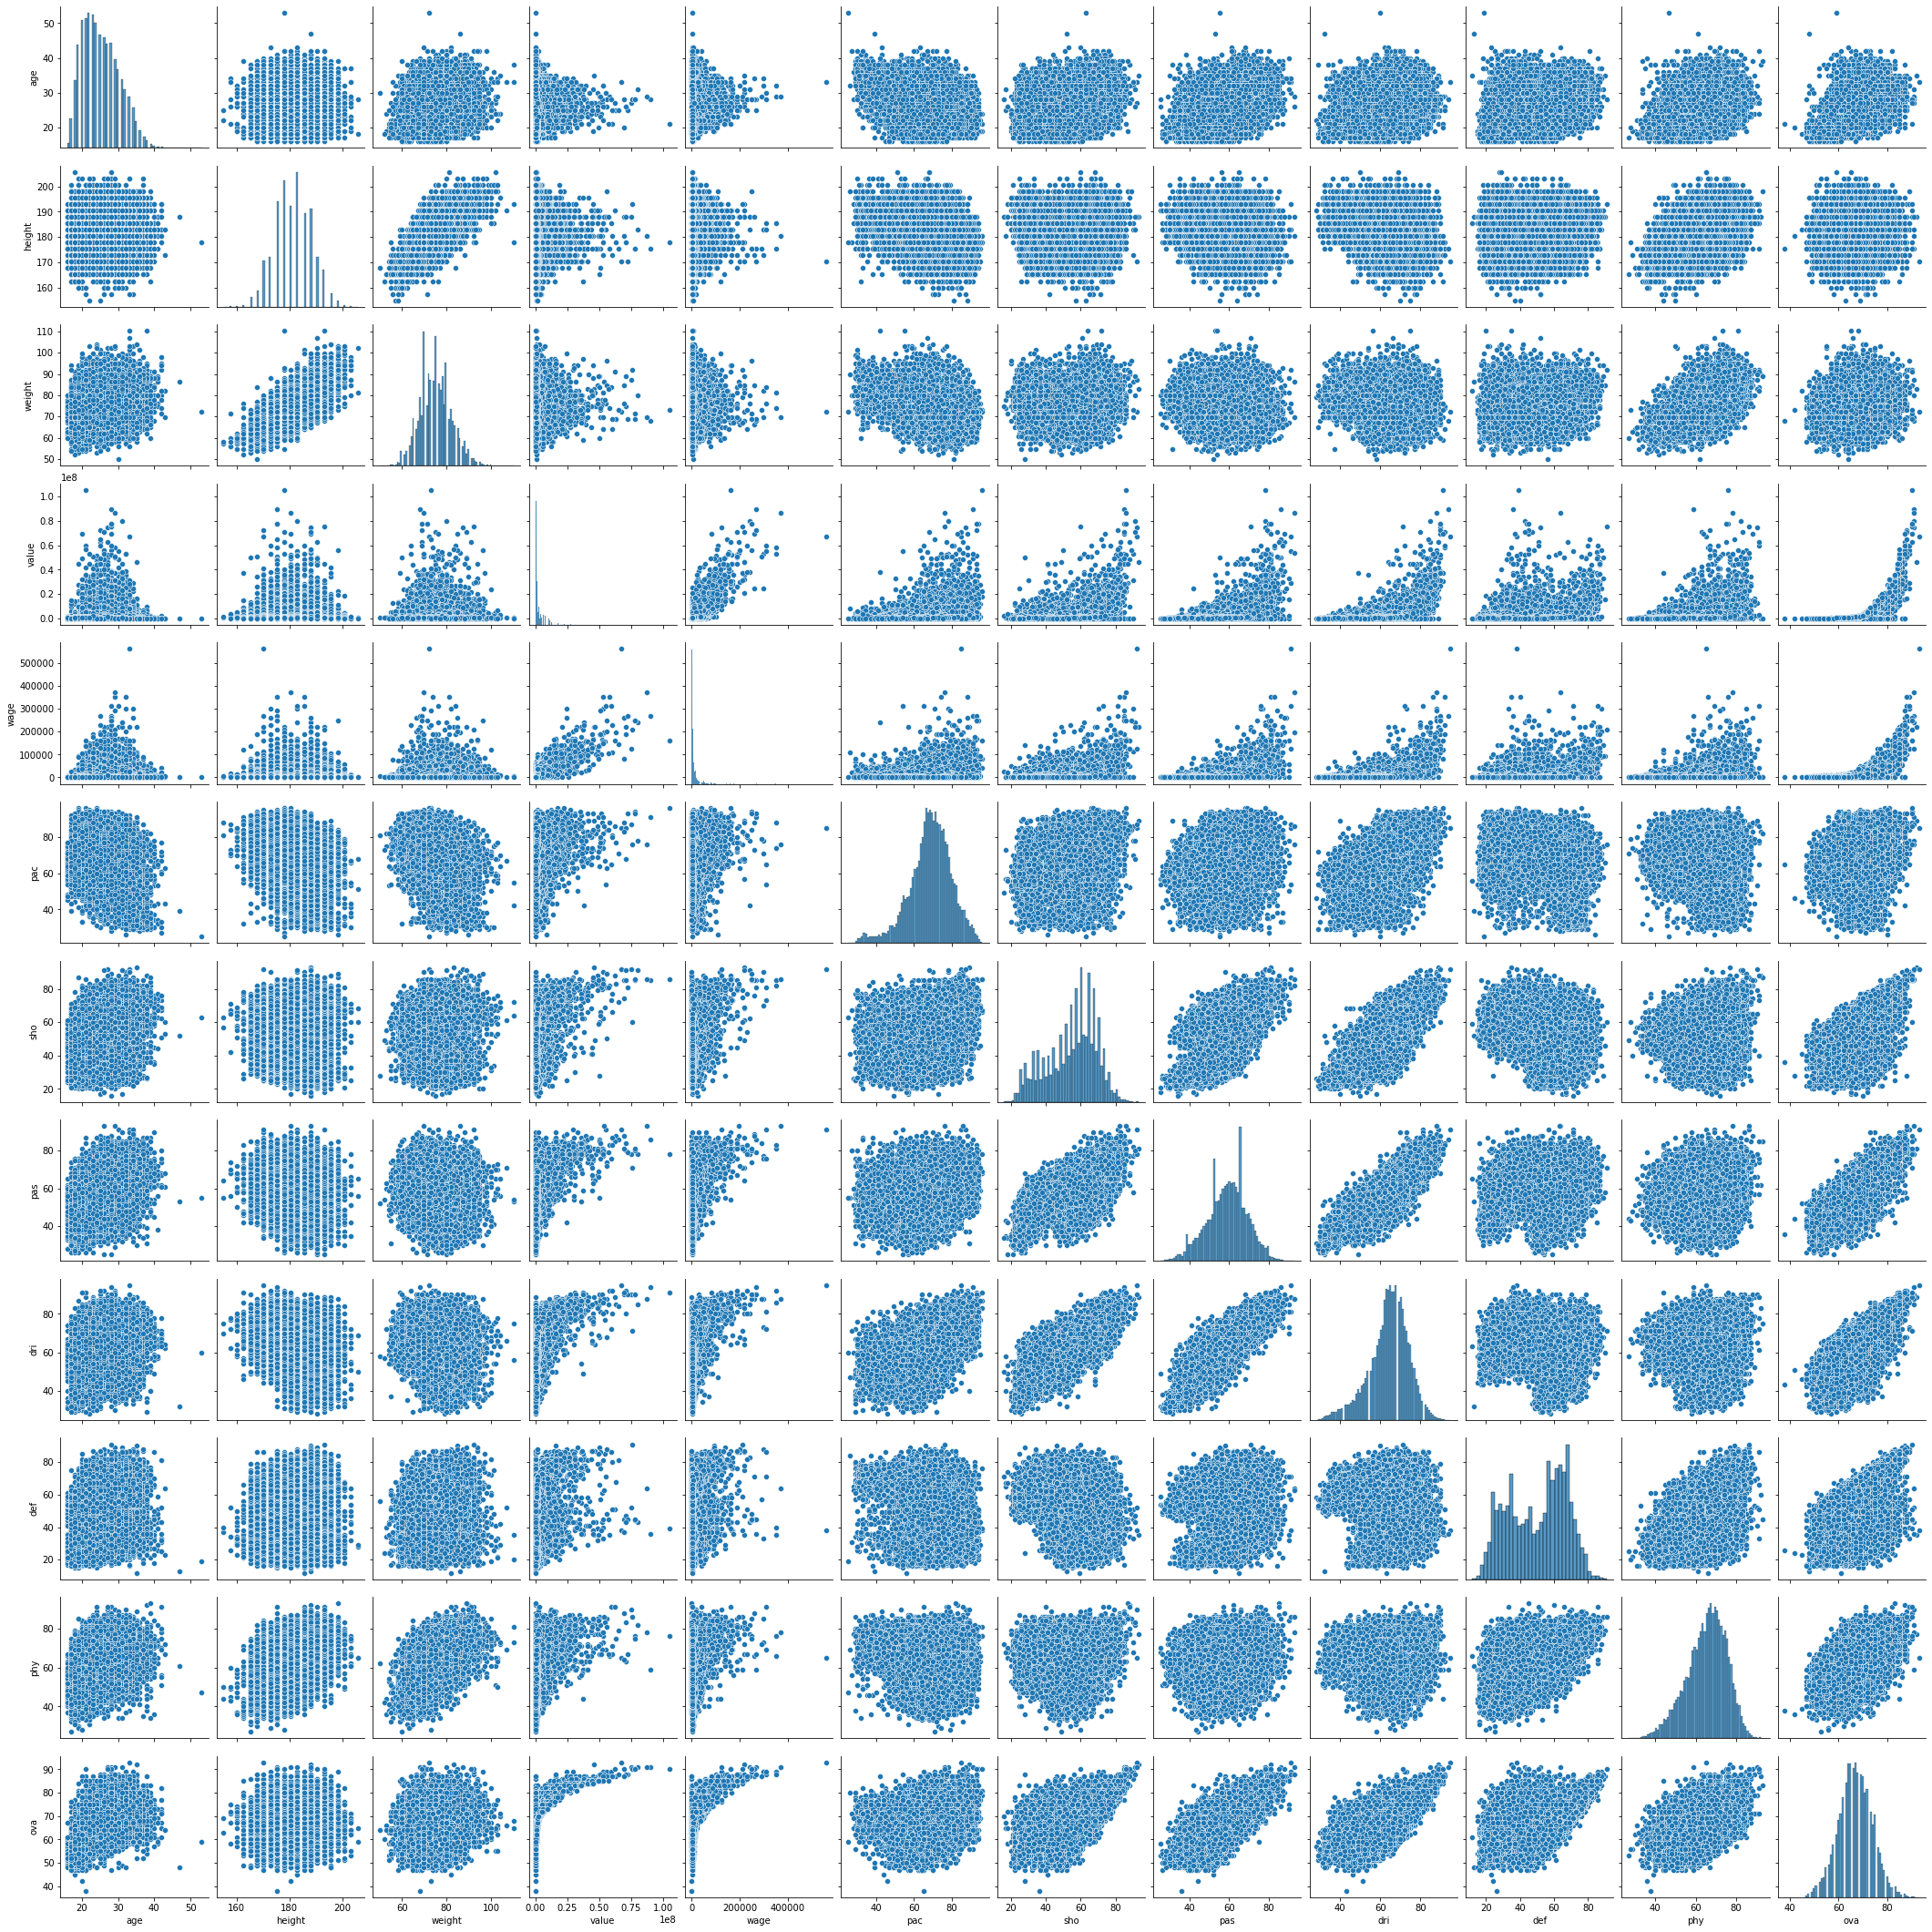

In [43]:
sns.pairplot(data_num)

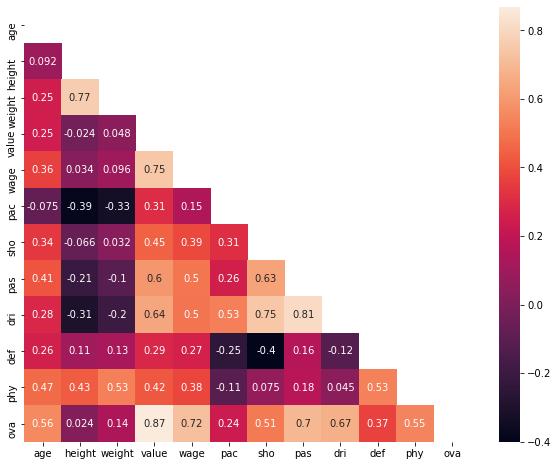

In [44]:
mask = np.zeros_like(data_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data_corr, mask=mask, annot=True)
plt.show()

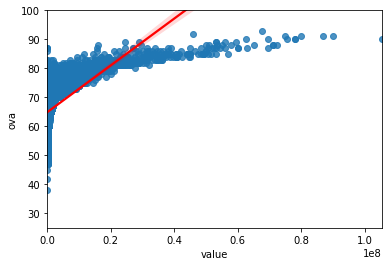

In [48]:
sns.regplot(data_num['value'],data_num['ova'] , line_kws={"color": "red"})
plt.ylim(25, 100)
plt.xlim(0, None)
plt.show()


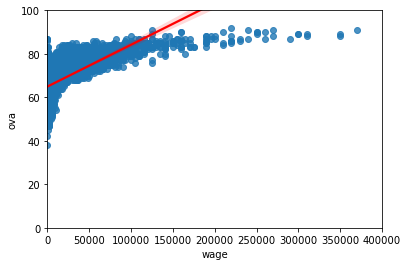

In [66]:
sns.regplot(data_num['wage'],data_num['ova'] , line_kws={"color": "red"})
plt.ylim(0, 100)
plt.xlim(0, 400000)
plt.show()

<AxesSubplot:xlabel='pas', ylabel='ova'>

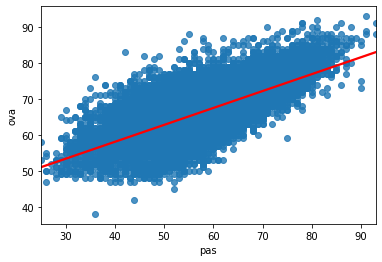

In [49]:
sns.regplot(data_num['pas'],data_num['ova'] , line_kws={"color": "red"})

In [50]:
# Checking and dropping outliers

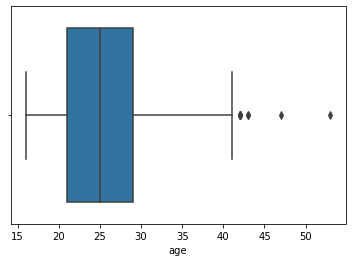

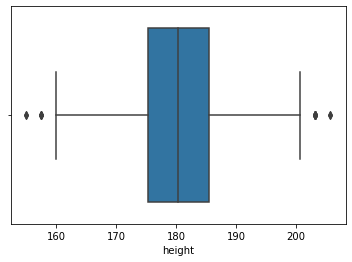

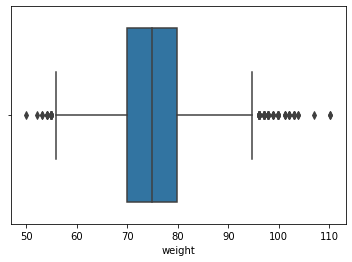

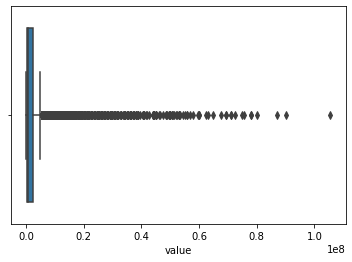

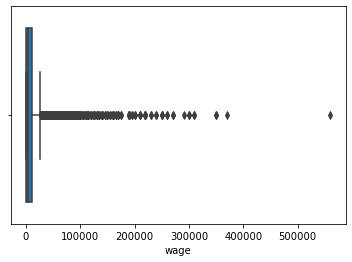

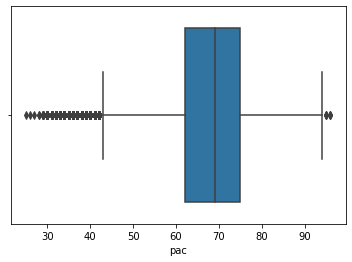

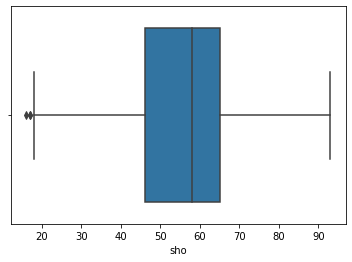

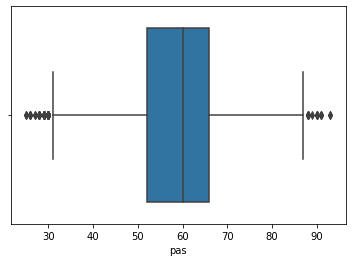

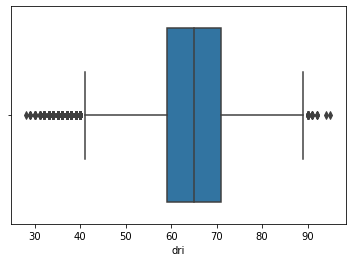

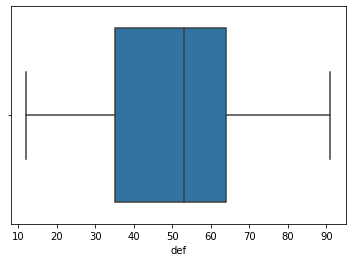

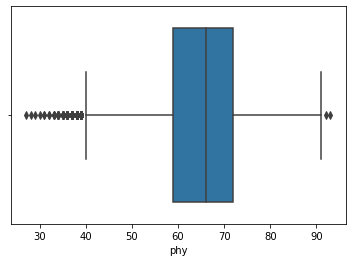

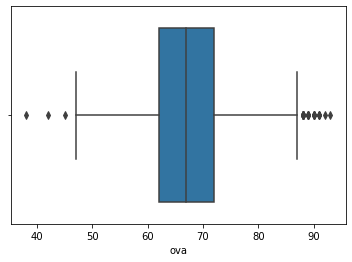

In [51]:
for column in data_num :
    sns.boxplot(data_num[column])
    plt.show()

In [52]:
for column in data_num:
    upper = np.percentile(data_num[column],75)
    lower = np.percentile(data_num[column],25)
    iqr = upper - lower
    upper_limit = upper + 1.5 * iqr
    lower_limit = lower - 1.5 * iqr
    clean_data_num = data_num[(data_num[column]>lower_limit) & (data_num[column]<upper_limit)]

In [53]:
data_num.describe()

,age,height,weight,value,wage,pac,sho,pas,dri,def,phy,ova
count,17102.000000,17102.000000,17102.000000,1.710200e+04,17102.000000,17102.000000,17102.000000,17102.000000,17102.000000,17102.000000,17102.000000,17102.000000
mean,25.267805,181.222955,75.138621,2.570830e+06,10547.093907,68.094726,54.964858,58.927026,64.211671,50.276927,64.913577,66.968483
std,4.939879,6.885727,7.171802,5.375409e+06,21156.060696,11.147717,13.876551,10.183593,9.833827,16.853633,9.659419,6.858379
min,16.000000,154.940000,49.895120,0.000000e+00,0.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000,38.000000
25%,21.000000,175.260000,69.853168,3.750000e+05,1000.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,25.000000,180.340000,74.842680,8.000000e+05,3000.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,67.000000
75%,29.000000,185.420000,79.832192,2.400000e+06,11000.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000
max,53.000000,205.740000,110.222856,1.055000e+08,560000.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000,93.000000


In [54]:
clean_data_num.describe()

,age,height,weight,value,wage,pac,sho,pas,dri,def,phy,ova
count,17038.000000,17038.000000,17038.000000,1.703800e+04,17038.000000,17038.000000,17038.000000,17038.000000,17038.000000,17038.000000,17038.000000,17038.000000
mean,25.260066,181.220607,75.131080,2.422986e+06,9981.828853,68.064444,54.905153,58.875983,64.161345,50.265642,64.889365,66.918359
std,4.937448,6.885425,7.164770,4.477405e+06,17649.495694,11.129105,13.812865,10.119266,9.765675,16.839993,9.626482,6.744594
min,16.000000,154.940000,49.895120,0.000000e+00,0.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000,48.000000
25%,21.000000,175.260000,69.853168,3.750000e+05,1000.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,25.000000,180.340000,74.842680,8.000000e+05,3000.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,67.000000
75%,29.000000,185.420000,79.832192,2.400000e+06,10000.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000
max,53.000000,205.740000,110.222856,5.700000e+07,230000.000000,96.000000,90.000000,90.000000,91.000000,89.000000,93.000000,86.000000


# Feature scaling

In [55]:
#log boxcox

def boxcox_transform(clean_data_num):
    numeric_cols = clean_data_num.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        clean_data_num[column] = np.where(clean_data_num[column]<=0, np.NAN, clean_data_num[column]) 
        clean_data_num[column] = clean_data_num[column].fillna(clean_data_num[column].mean())
        transformed_data, ci = stats.boxcox(clean_data_num[column])
        clean_data_num[column] = transformed_data
        _ci[column] = ci
    return clean_data_num, _ci

In [56]:
clean_data_num, _ci = boxcox_transform(clean_data_num)

# ML model

In [57]:
# adding clean numericals & categoricals

data_clean4 = data_cat.merge(clean_data_num, right_index=True, left_index=True)
data_clean4

,nationality,club,bp,foot,age,height,weight,value,wage,pac,sho,pas,dri,def,phy,ova
id,,,,,,,,,,,,,,,,
2,Italy,Udinese,LWB,Left,2.311877,120.814948,5.689154,9.469537,6.422990,2555.596261,520.141207,337.908383,5818.332130,78.023653,3191.412746,99.169953
16,Spain,KAS Eupen,CM,Right,2.358018,117.754359,5.309373,9.449852,6.422990,1422.284635,674.499586,359.303733,5460.561770,65.916094,2641.538160,102.403799
27,England,Coventry City,CAM,Right,2.311877,116.220878,5.499201,9.737670,6.797895,1024.556359,658.354161,381.107588,6967.059792,39.646883,1772.615278,102.403799
36,Trinidad &amp; Tobago,Sunderland,ST,Right,2.347091,119.285705,5.538808,10.110002,6.611830,1885.208454,626.530606,310.032979,5460.561770,52.709877,2386.765382,97.556983
41,Spain,Vissel Kobe,CAM,Right,2.347091,113.147373,5.385590,10.457133,6.690392,1703.969639,690.799740,448.884835,8677.442717,71.958770,2304.816036,118.722999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,France,CD Tondela,CB,Right,2.137052,129.947988,5.538808,9.407746,5.756978,1476.583981,169.061944,132.782785,2438.771189,73.170024,3191.412746,91.132270
259090,Wales,Burnley,CAM,Right,2.043592,117.754359,5.587134,8.679736,5.979593,1947.659751,344.059854,250.157912,3434.570545,47.941357,1991.840841,78.421369
259091,England,Burnley,RB,Right,2.043592,116.220878,5.427735,8.679736,5.756978,2011.130331,218.473607,171.205507,2913.299989,61.099158,1991.840841,78.421369


In [58]:
# Encoding categorical values

data_clean5 = data_clean4.copy()
data_clean5 = pd.get_dummies(data_clean5, drop_first=True)
data_clean5

,age,height,weight,value,wage,pac,sho,pas,dri,def,...,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
id,,,,,,,,,,,,,,,,,,,,,
2,2.311877,120.814948,5.689154,9.469537,6.422990,2555.596261,520.141207,337.908383,5818.332130,78.023653,...,0,0,0,1,0,0,0,0,0,0
16,2.358018,117.754359,5.309373,9.449852,6.422990,1422.284635,674.499586,359.303733,5460.561770,65.916094,...,0,0,0,0,0,0,0,0,0,1
27,2.311877,116.220878,5.499201,9.737670,6.797895,1024.556359,658.354161,381.107588,6967.059792,39.646883,...,0,0,0,0,0,0,0,0,0,1
36,2.347091,119.285705,5.538808,10.110002,6.611830,1885.208454,626.530606,310.032979,5460.561770,52.709877,...,0,0,0,0,0,0,0,0,1,1
41,2.347091,113.147373,5.385590,10.457133,6.690392,1703.969639,690.799740,448.884835,8677.442717,71.958770,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,2.137052,129.947988,5.538808,9.407746,5.756978,1476.583981,169.061944,132.782785,2438.771189,73.170024,...,0,0,0,0,0,0,0,0,0,1
259090,2.043592,117.754359,5.587134,8.679736,5.979593,1947.659751,344.059854,250.157912,3434.570545,47.941357,...,0,0,0,0,0,0,0,0,0,1
259091,2.043592,116.220878,5.427735,8.679736,5.756978,2011.130331,218.473607,171.205507,2913.299989,61.099158,...,0,0,0,0,1,0,0,0,0,1


In [59]:
# TESTING & RUNNING THE MODEL

# splitting our data

X = data_clean5.drop('ova', axis=1)
y = data_clean5['ova']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
predictions = model.predict(X_test)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [63]:
print("The R2_score is",r2_score(y_test, predictions))
print ("The mean_absolute_error is", mean_absolute_error(y_test, predictions))
print("The mean_squared error is", mean_squared_error(y_test, predictions, squared=False))

The R2_score is 0.9578698176865053
The mean_absolute_error is 1.4612794162358484
The mean_squared error is 2.2292466346614255


<AxesSubplot:ylabel='ova'>

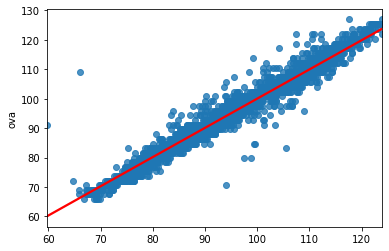

In [64]:
sns.regplot(predictions, y_test, line_kws={"color": "red"})

# Predicting only with value and wage

In [73]:
# TESTING & RUNNING THE MODEL

# splitting our data

X = data_clean5[['value','wage']]
y = data_clean5['ova']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
predictions = model.predict(X_test)

In [76]:
print("The R2_score is",r2_score(y_test, predictions))
print ("The mean_absolute_error is", mean_absolute_error(y_test, predictions))
print("The mean_squared error is", mean_squared_error(y_test, predictions, squared=False))

The R2_score is 0.8565027068495423
The mean_absolute_error is 2.768132126610002
The mean_squared error is 4.114180153782039


<AxesSubplot:ylabel='ova'>

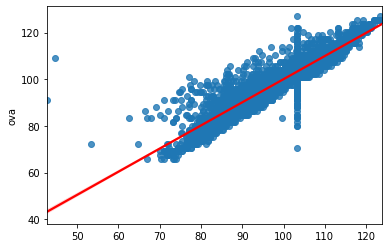

In [77]:
sns.regplot(predictions, y_test, line_kws={"color": "red"})

# Conclusions

- We can accurately estimate how good a player is by its market value and wage